In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
raw_path = Path('../data/raw')
interim_path = Path('../data/interim')

In [4]:
df = pd.read_csv(interim_path / 'properties_cleaned_v2.csv')

In [5]:
df.shape

(5933, 23)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,2160.0,Plot area 240(200.67 sq.m.),3,3,3,3.0,North,Relatively New,NaN,2160.0,NaN,0,0,1,1,0,0,86
1,house,omkar bunglows,thaltej,4.75,15079.0,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 315 ...,4,4,1,2.0,East,Old Property,NaN,315.0,NaN,0,0,1,1,0,1,161
2,flat,sheeva amardeep enclave,nava naroda,0.27,21600.0,125.0,Built Up area: 125 (11.61 sq.m.)Carpet area: 1...,2,2,1,3.0,NaN,Undefined,NaN,125.0,115.0,0,0,0,0,0,0,0
3,flat,arizona river heights,usmanpura,2.10,8909.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3,3,2,11.0,East,Moderately Old,2357.0,NaN,1415.0,0,0,0,1,1,1,54
4,flat,avirat silver harmony,gota,0.98,4839.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,1,9.0,East,Moderately Old,2025.0,NaN,NaN,0,0,1,0,0,0,75


In [7]:
df.shape

(5933, 23)

In [8]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

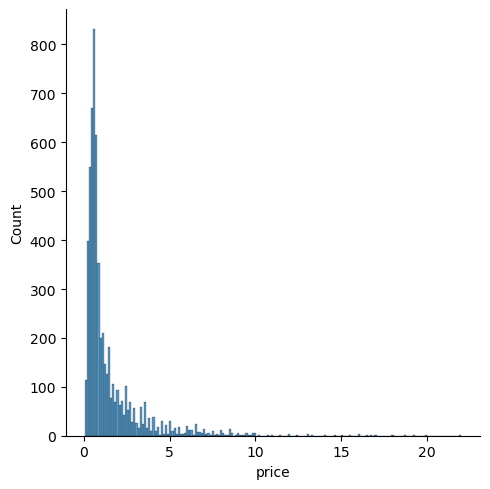

In [9]:
# outliers on the basis of price column
sns.displot(df['price'])

<Axes: xlabel='price'>

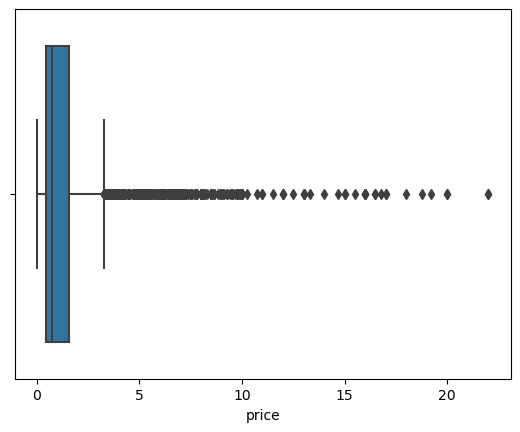

In [10]:
sns.boxplot(x=df['price'])

In [11]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(624,
 count    624.000000
 mean       5.803942
 std        2.925587
 min        3.300000
 25%        3.790000
 50%        5.000000
 75%        6.630000
 max       22.000000
 Name: price, dtype: float64)

In [12]:
outliers.sort_values('price',ascending=False).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2621,house,anurita bungalows,thaltej,22.0,298507.0,737.0,Plot area 1100(102.19 sq.m.)Carpet area: 737 s...,4,4,3,2.0,East,Under Construction,NaN,NaN,737.0,1,0,1,1,0,0,200
3987,house,on request,science city,22.0,21256.0,10350.0,Plot area 1400(1170.58 sq.m.)Built Up area: 13...,5,4,3,2.0,North-East,Relatively New,NaN,1300.0,1150.0,1,1,1,1,0,1,96
1305,house,neelkanth greens villa,thaltej,20.0,12005.0,16660.0,Plot area 1851(1547.67 sq.m.)Built Up area: 70...,4,4,1,3.0,East,Moderately Old,NaN,700.0,NaN,0,0,1,1,0,1,105
5407,house,individual bunglow,science city,20.0,19324.0,10350.0,Plot area 1378(1152.18 sq.m.)Carpet area: 1150...,5,5,2,2.0,North,Relatively New,NaN,NaN,1150.0,1,1,1,1,0,1,98
4803,flat,ikebana,bodakdev,19.2,12000.0,16000.0,Super Built up area 16000(1486.45 sq.m.),6,7,2,19.0,East,Under Construction,16000.0,NaN,NaN,1,1,1,1,0,0,253


In [13]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

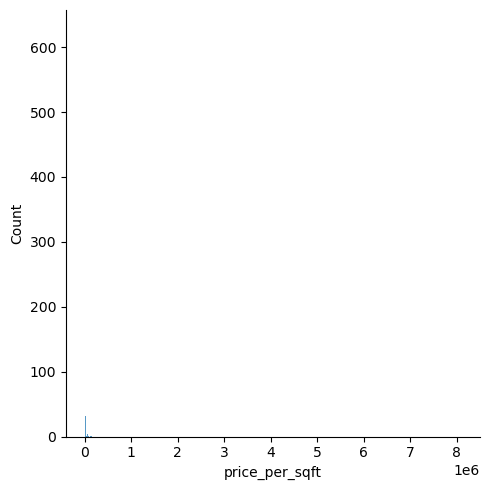

In [14]:
sns.displot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

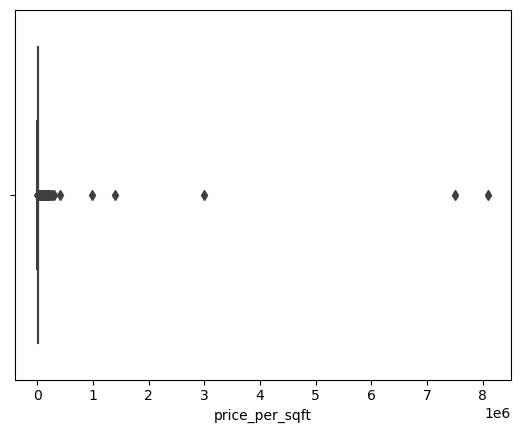

In [15]:
sns.boxplot(x=df['price_per_sqft'])

In [16]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.80)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(464,
 count    4.640000e+02
 mean     1.029562e+05
 std      5.326021e+05
 min      2.039400e+04
 25%      2.896675e+04
 50%      4.240350e+04
 75%      7.402500e+04
 max      8.100000e+06
 Name: price_per_sqft, dtype: float64)

In [17]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1200 else x)

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6412\3310256366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1200 else x)


In [18]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\Arpit\AppData\Local\Temp\ipykernel_6412\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [19]:
outliers_sqft['price_per_sqft'].describe()

count       464.000000
mean      13403.415948
std       59684.446068
min        2252.000000
25%        3569.750000
50%        5556.000000
75%       10007.750000
max      900000.000000
Name: price_per_sqft, dtype: float64

In [20]:
df.update(outliers_sqft)

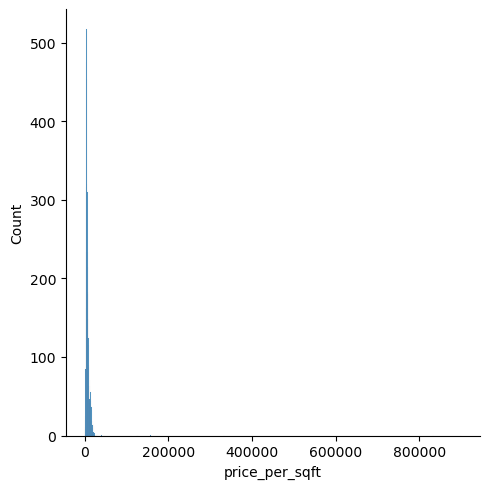

In [21]:
sns.displot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

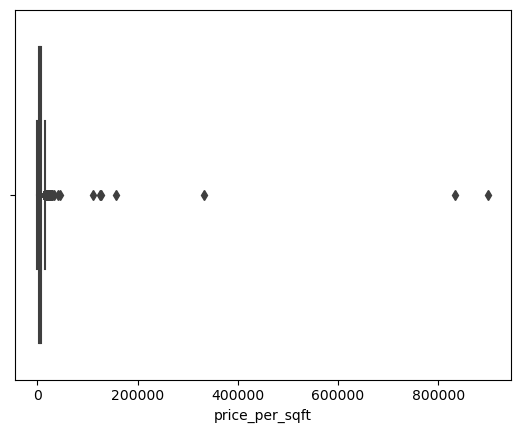

In [22]:
sns.boxplot(x=df['price_per_sqft'])

In [23]:
df[df['price_per_sqft']>30000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
311,house,malhar bungalows,shilaj,17.00,124088.0,1370.0,Plot area 1370(127.28 sq.m.),4.0,5.0,3+,3.0,East,New Property,NaN,1370.00,NaN,1.0,1.0,1.0,1.0,0.0,1.0,54.0
343,house,arth bunglow,prahlad nagar,1.70,157407.0,108.0,Plot area 1.35(1.13 sq.m.),3.0,3.0,1,2.0,NaN,Moderately Old,NaN,12.15,NaN,0.0,0.0,0.0,0.0,1.0,1.0,56.0
403,house,independent,vastral,4.26,45079.0,945.0,Built Up area: 105 (9.75 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,105.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,house,the north park by adani realty,vaishnodevi circle,18.00,127298.0,1414.0,Plot area 1414(131.36 sq.m.)Built Up area: 105...,5.0,6.0,3,2.0,North-East,Under Construction,NaN,1050.00,990.0,1.0,1.0,0.0,1.0,1.0,0.0,147.0
850,flat,satya square,chandkheda,0.81,900000.0,9.0,Carpet area: 1 (0.09 sq.m.),3.0,3.0,1,6.0,NaN,Moderately Old,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2621,house,anurita bungalows,thaltej,22.00,33167.0,6633.0,Plot area 1100(102.19 sq.m.)Carpet area: 737 s...,4.0,4.0,3,2.0,East,Under Construction,NaN,NaN,737.0,1.0,0.0,1.0,1.0,0.0,0.0,200.0
3403,house,nishant ratnaakar verte,south bopal,3.00,833333.0,36.0,Plot area 4(0.37 sq.m.),4.0,5.0,3+,4.0,NaN,New Property,NaN,4.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3463,flat,swastik serenity,narol,0.20,111111.0,18.0,Carpet area: 2 (0.19 sq.m.),2.0,1.0,2,7.0,South,Relatively New,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
3718,house,rachana society,satellite,6.51,40185.0,1620.0,Plot area 1620(150.5 sq.m.)Carpet area: 5760 s...,2.0,2.0,2,2.0,North-West,Old Property,NaN,NaN,5760.0,1.0,0.0,1.0,1.0,0.0,1.0,156.0
4748,house,independent,ctm,0.30,333333.0,9.0,Plot area 1(0.09 sq.m.),1.0,1.0,1,1.0,NaN,Old Property,NaN,1.00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

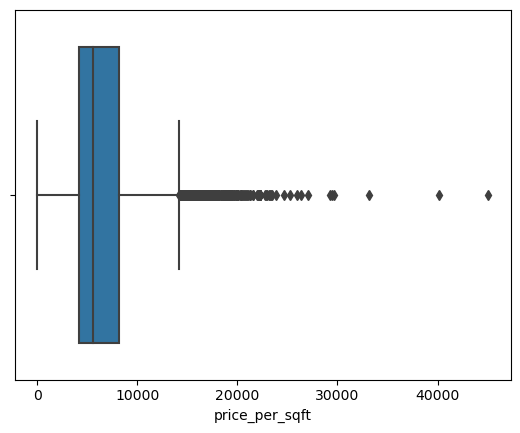

In [25]:
sns.boxplot(x=df['price_per_sqft'])

### Area

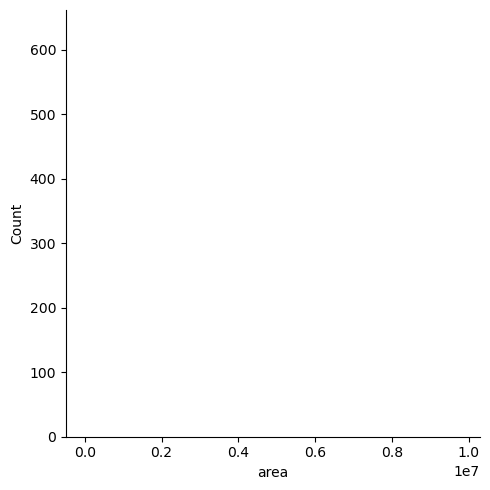

In [26]:
sns.displot(df['area'])

<Axes: xlabel='area'>

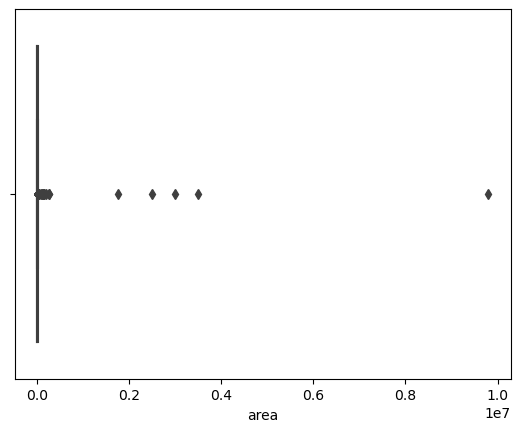

In [27]:
sns.boxplot(x=df['area'])

In [28]:
df['area'].describe()

count    5.914000e+03
mean     5.619527e+03
std      1.463878e+05
min      5.600000e+01
25%      1.044000e+03
50%      1.435000e+03
75%      2.139750e+03
max      9.800000e+06
Name: area, dtype: float64

In [29]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
57,flat,aakruti aangan,vatva,0.15,6.0,250000.0,Carpet area: 23431,1.0,1.0,1,2.0,North-East,Moderately Old,NaN,NaN,2.343100e+04,0.0,0.0,0.0,0.0,0.0,0.0,46.0
137,flat,parshwanath metrocity,chandkheda,0.98,1.0,9800000.0,Super Built up area 1665210(1392327.64 sq.m.),3.0,3.0,3,1.0,North,Moderately Old,1665210.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,31.0
140,house,sudama homes 2,nana chiloda,1.50,115.0,130435.0,Plot area 3(12140.58 sq.m.),4.0,4.0,2,1.0,NaN,Relatively New,NaN,3.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634,flat,vision madhuvan glory,nava naroda,0.32,24.0,133333.0,Super Built up area 125(12500 sq.m.)Built Up a...,2.0,2.0,3,2.0,West,Moderately Old,125.0,120.0,9.000000e+01,0.0,0.0,0.0,1.0,0.0,0.0,23.0
1997,flat,avirat silver habitat,odhav,0.30,1.0,3000000.0,Carpet area: 121 (489670.06 sq.m.),2.0,2.0,1,2.0,NaN,Relatively New,NaN,NaN,1.210000e+02,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2161,flat,jeevan pran residency,nava naroda,0.35,29.0,120690.0,Built Up area: 113 (11300 sq.m.),2.0,2.0,1,2.0,East,Moderately Old,NaN,113.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,31.0
3162,flat,vision madhuvan glory,nava naroda,0.30,22.0,136364.0,Super Built up area 125(12500 sq.m.)Built Up a...,2.0,2.0,3,2.0,East,Moderately Old,125.0,110.0,1.000000e+02,0.0,0.0,0.0,1.0,0.0,0.0,54.0
3204,flat,507 nandanvan recidency aslali highway,narol,0.25,1.0,2500000.0,Carpet area: 2000000 (185806.08 sq.m.),1.0,2.0,1,5.0,NaN,Relatively New,NaN,NaN,2.000000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3387,flat,olive greens,gota,1.25,114.0,109649.0,Carpet area: 109524 (10175.11 sq.m.),3.0,3.0,1,6.0,West,Relatively New,NaN,NaN,1.095240e+05,1.0,1.0,0.0,1.0,1.0,0.0,53.0
3532,house,independent,sarkhej,0.70,2.0,3500000.0,Plot area 99(400639.14 sq.m.),3.0,3.0,1,1.0,South-West,New Property,NaN,99.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df = df[df['area'] < 100000]

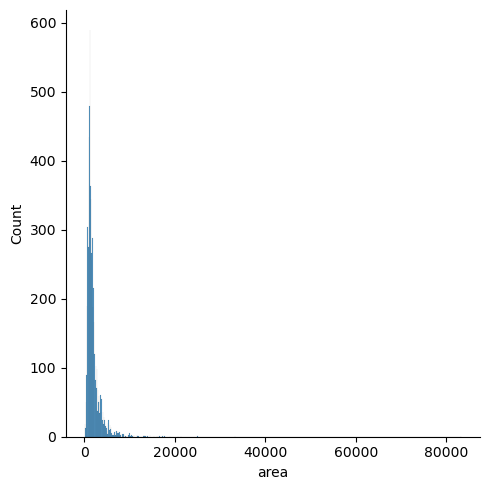

In [31]:
sns.displot(df['area'])

<Axes: xlabel='area'>

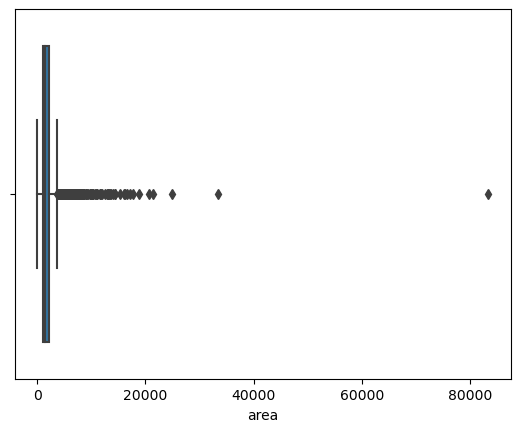

In [32]:
sns.boxplot(x=df['area'])

In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1776,flat,amogha by adani realty,vaishnodevi circle,0.80,96.0,83333.0,Carpet area: 82613 (7675 sq.m.),3.0,3.0,1,14.0,NaN,New Property,NaN,NaN,82613.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0
237,house,rajeshwari society,ctm,0.32,96.0,33333.0,Built Up area: 33189 (3083.36 sq.m.),1.0,1.0,1,2.0,East,Old Property,NaN,33189.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,8.0
5134,house,independent,nana chiloda,1.80,720.0,25000.0,Plot area 25000(2322.58 sq.m.),4.0,2.0,2,1.0,East,Old Property,NaN,25000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0
5380,flat,s r shivalay heights,motera,7.83,3672.0,21324.0,Carpet area: 21333 (1981.9 sq.m.),2.0,2.0,1,1.0,NaN,New Property,NaN,NaN,21333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1752,house,independent,nava naroda,2.25,1087.0,20699.0,Plot area 2300(1923.09 sq.m.),4.0,5.0,2,3.0,NaN,Moderately Old,NaN,20700.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,flat,status 55,science city,1.66,878.0,18907.0,Built Up area: 2376 (1986.64 sq.m.)Carpet area...,3.0,3.0,3,8.0,West,New Property,NaN,2376.0,2100.0,1.0,0.0,1.0,1.0,0.0,0.0,204.0
3899,flat,vishnudhara garden,gota,1.00,566.0,17668.0,Carpet area: 1962 (1640.48 sq.m.),3.0,2.0,2,1.0,North,New Property,NaN,NaN,1962.0,1.0,0.0,1.0,1.0,0.0,0.0,169.0
2353,house,independent,thaltej,2.50,1456.0,17170.0,Plot area 1908(1595.33 sq.m.),4.0,4.0,1,1.0,East,Relatively New,NaN,17172.0,NaN,1.0,0.0,1.0,1.0,0.0,2.0,104.0
1305,house,neelkanth greens villa,thaltej,20.00,12005.0,16660.0,Plot area 1851(1547.67 sq.m.)Built Up area: 70...,4.0,4.0,1,3.0,East,Moderately Old,NaN,700.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,105.0
4409,flat,avirat silver harmony 2,gota,1.08,663.0,16290.0,Built Up area: 2115 Carpet area: 1515 sq.m.,3.0,3.0,2,3.0,West,Under Construction,NaN,2115.0,1515.0,1.0,0.0,0.0,1.0,0.0,0.0,124.0


In [34]:
temp = df[df['area'] > 10000].sort_values('area',ascending=False)
temp[['price','area','super_built_up_area','built_up_area','carpet_area','areaWithType']]

,price,area,super_built_up_area,built_up_area,carpet_area,areaWithType
1776,0.80,83333.0,NaN,NaN,82613.0,Carpet area: 82613 (7675 sq.m.)
237,0.32,33333.0,NaN,33189.0,NaN,Built Up area: 33189 (3083.36 sq.m.)
5134,1.80,25000.0,NaN,25000.0,NaN,Plot area 25000(2322.58 sq.m.)
5380,7.83,21324.0,NaN,NaN,21333.0,Carpet area: 21333 (1981.9 sq.m.)
1752,2.25,20699.0,NaN,20700.0,NaN,Plot area 2300(1923.09 sq.m.)
454,1.66,18907.0,NaN,2376.0,2100.0,Built Up area: 2376 (1986.64 sq.m.)Carpet area...
3899,1.00,17668.0,NaN,NaN,1962.0,Carpet area: 1962 (1640.48 sq.m.)
2353,2.50,17170.0,NaN,17172.0,NaN,Plot area 1908(1595.33 sq.m.)
1305,20.00,16660.0,NaN,700.0,NaN,Plot area 1851(1547.67 sq.m.)Built Up area: 70...
4409,1.08,16290.0,NaN,2115.0,1515.0,Built Up area: 2115 Carpet area: 1515 sq.m.


In [35]:
df = df[~((df['price']<5) & (df['area']>10000))]

In [36]:
df = df[df['area']<17000]

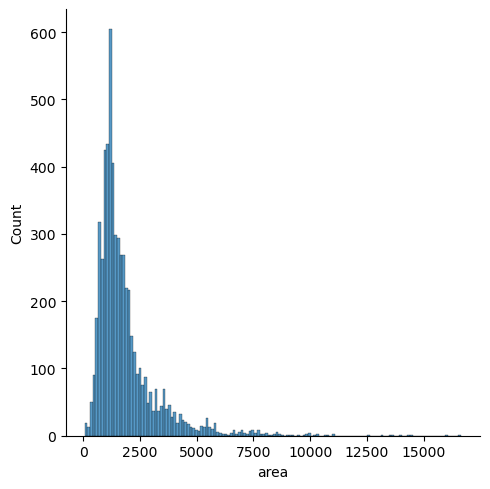

In [37]:
sns.displot(df['area'])

<Axes: xlabel='area'>

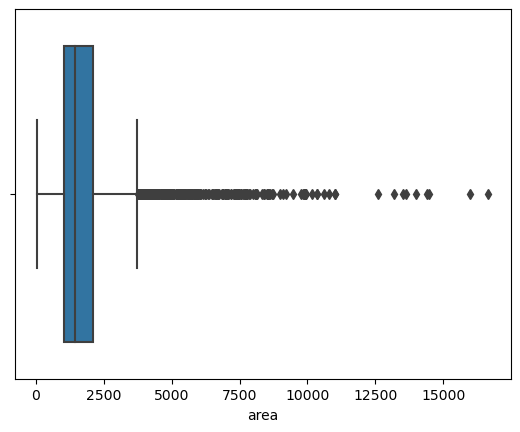

In [38]:
sns.boxplot(x=df['area'])

In [39]:
df['area'].describe()

count     5883.000000
mean      1851.516573
std       1428.634581
min         56.000000
25%       1043.000000
50%       1430.000000
75%       2115.000000
max      16660.000000
Name: area, dtype: float64

### Bedroom

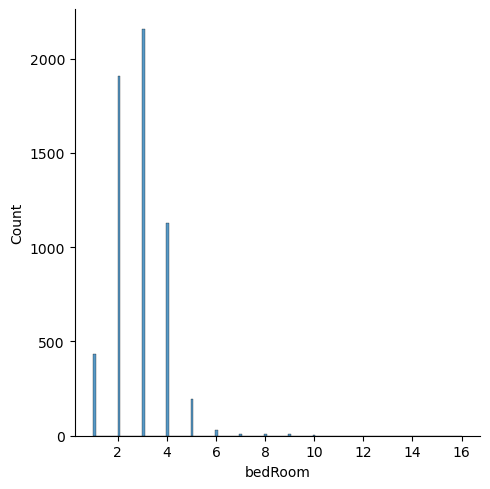

In [40]:
sns.displot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

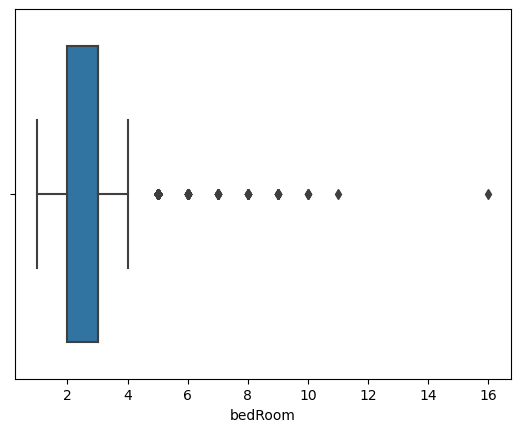

In [41]:
sns.boxplot(x=df['bedRoom'])

In [42]:
df['bedRoom'].describe()

count    5883.000000
mean        2.831209
std         1.062913
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        16.000000
Name: bedRoom, dtype: float64

In [43]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5340,house,independent,sarkhej,2.0,11111.0,1800.0,Plot area 1800(167.23 sq.m.),16.0,16.0,3+,3.0,South-West,Old Property,NaN,1800.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,55.0
5132,flat,mangalam flats,bapunagar,1.1,4074.0,2700.0,Carpet area: 300 (27.87 sq.m.),11.0,7.0,3,0.0,North-East,Old Property,NaN,NaN,300.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0


In [44]:
df = df[df['bedRoom'] <= 10]

In [45]:
df.shape

(5881, 23)

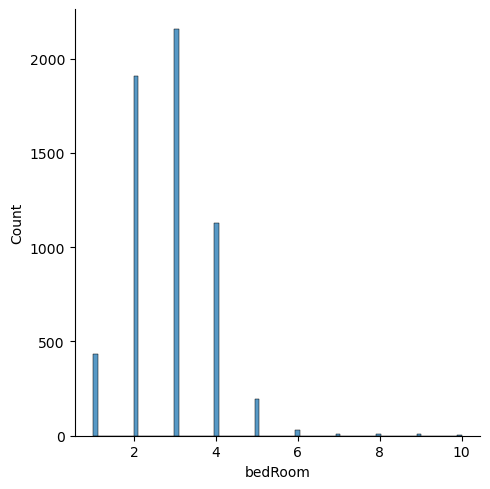

In [46]:
sns.displot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

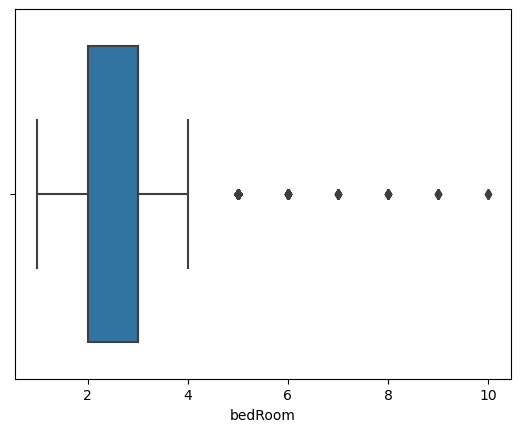

In [47]:
sns.boxplot(x=df['bedRoom'])

In [48]:
df['bedRoom'].describe()

count    5881.000000
mean        2.827580
std         1.043702
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

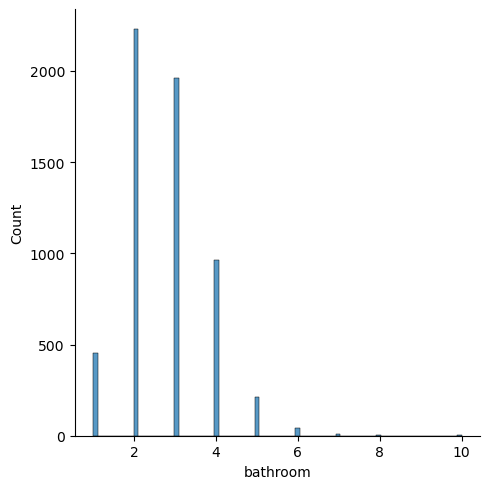

In [49]:
sns.displot(df['bathroom'])

<Axes: xlabel='bathroom'>

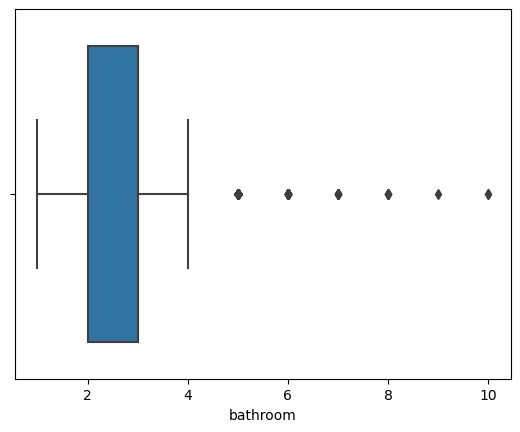

In [50]:
sns.boxplot(x=df['bathroom'])

In [51]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [52]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3,3.0,North,Relatively New,NaN,2160.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,86.0
1,house,omkar bunglows,thaltej,4.75,15079.0,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 315 ...,4.0,4.0,1,2.0,East,Old Property,NaN,315.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,161.0
2,flat,sheeva amardeep enclave,nava naroda,0.27,2400.0,1125.0,Built Up area: 125 (11.61 sq.m.)Carpet area: 1...,2.0,2.0,1,3.0,NaN,Undefined,NaN,125.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,arizona river heights,usmanpura,2.10,8909.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3.0,3.0,2,11.0,East,Moderately Old,2357.0,NaN,1415.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0
4,flat,avirat silver harmony,gota,0.98,4839.0,2025.0,Super Built up area 2025(188.13 sq.m.),3.0,3.0,1,9.0,East,Moderately Old,2025.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,75.0


### super built up area

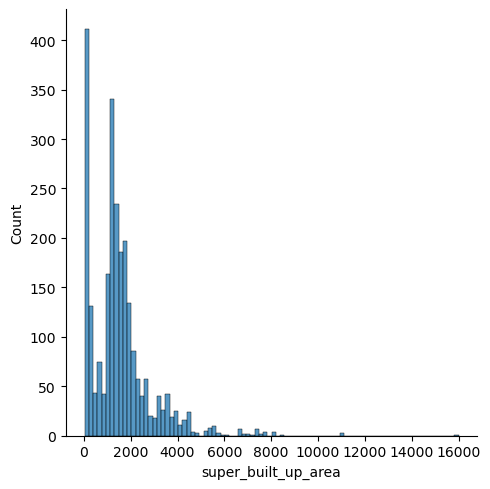

In [53]:
sns.displot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

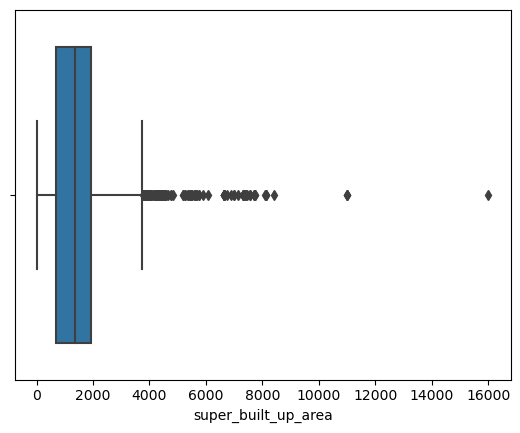

In [54]:
sns.boxplot(x=df['super_built_up_area'])

In [55]:
df['super_built_up_area'].describe()

count     2505.000000
mean      1549.509190
std       1341.418723
min         30.000000
25%        680.000000
50%       1350.000000
75%       1918.000000
max      16000.000000
Name: super_built_up_area, dtype: float64

In [56]:
df[df['super_built_up_area'] <100].head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
146,flat,shreem umang vatva,vatva,0.15,2564.0,585.0,Super Built up area 65(54.35 sq.m.),1.0,1.0,0,3.0,NaN,Moderately Old,65.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,17.0
215,flat,satkar homes,narol,0.14,1941.0,721.0,Super Built up area 83(69.4 sq.m.)Built Up are...,1.0,1.0,2,4.0,East,Moderately Old,83.00,80.0,75.00,0.0,0.0,0.0,0.0,1.0,0.0,47.0
295,flat,ample tulsi residency,nava naroda,0.30,6173.0,486.0,Super Built up area 53.55(4.97 sq.m.)Carpet ar...,2.0,2.0,2,2.0,NaN,Relatively New,53.55,NaN,48.46,0.0,0.0,0.0,0.0,1.0,0.0,47.0
312,flat,tulsi pavan residency,chandkheda,0.32,4134.0,774.0,Super Built up area 86(71.91 sq.m.),1.0,1.0,0,1.0,NaN,Moderately Old,86.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2.0,35.0
430,flat,samor residency,vatva,0.11,1528.0,720.0,Super Built up area 80(66.89 sq.m.),1.0,2.0,1,7.0,NaN,Relatively New,80.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

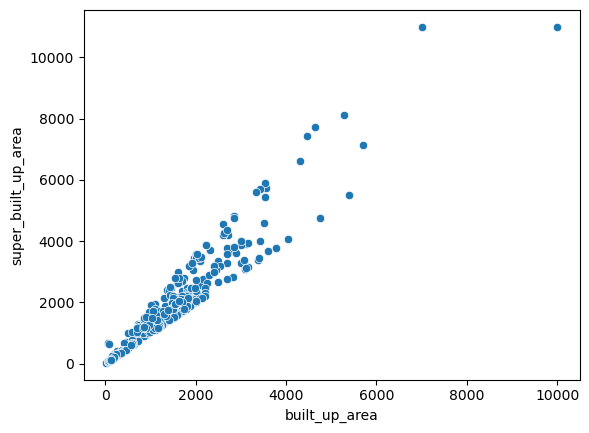

In [57]:
sns.scatterplot(df,x='built_up_area',y='super_built_up_area')

### built up area

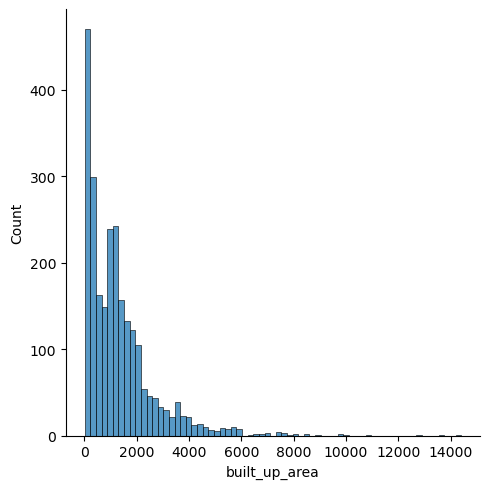

In [58]:
sns.displot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

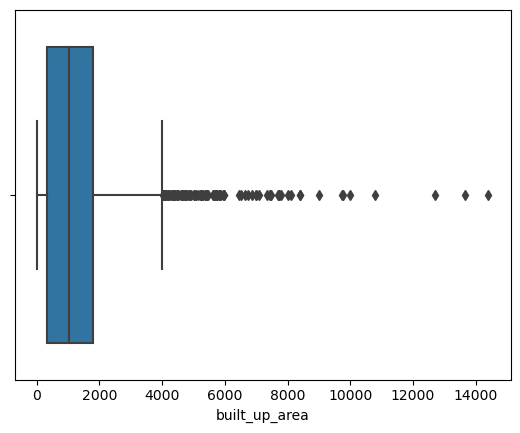

In [59]:
sns.boxplot(x=df['built_up_area'])

In [60]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
653,flat,upcoming new project,bodakdev,13.34,19090.0,6988.0,Built Up area: 12700 (1179.87 sq.m.)Carpet are...,5.0,5.0,2,6.0,East,Under Construction,NaN,12700.0,6985.0,1.0,1.0,1.0,1.0,0.0,0.0,213.0
2047,house,bakeri serendeep mansion,ghuma,9.25,6424.0,14399.0,Plot area 1600(1337.8 sq.m.),4.0,4.0,2,4.0,East,Moderately Old,NaN,14400.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,39.0
4356,house,independent,shela,11.50,8430.0,13642.0,Plot area 13641(1267.29 sq.m.),3.0,3.0,1,1.0,North,Moderately Old,NaN,13641.0,NaN,0.0,0.0,1.0,1.0,0.0,2.0,82.0
5682,house,independentdanbag bunglow,shela,10.00,9259.0,10800.0,Plot area 1200(1003.35 sq.m.),4.0,4.0,2,2.0,North-East,Old Property,NaN,10800.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,95.0


### carpet area

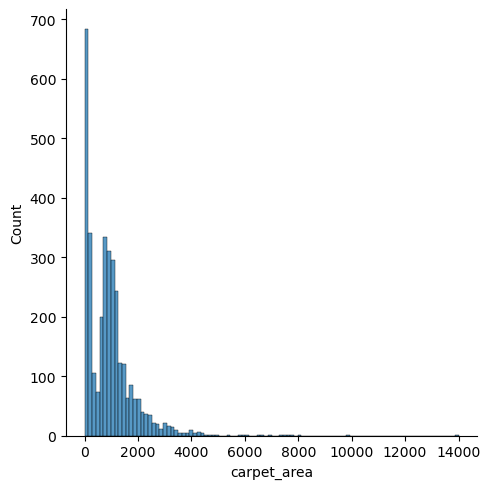

In [61]:
sns.displot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

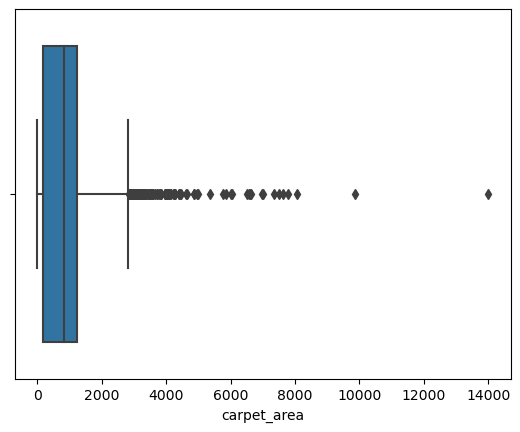

In [62]:
sns.boxplot(x=df['carpet_area'])

In [63]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1254,flat,ikebana,bodakdev,14.7,10500.0,14000.0,Carpet area: 14000 (1300.64 sq.m.),6.0,7.0,2,16.0,East,Under Construction,NaN,NaN,14000.0,1.0,1.0,1.0,1.0,0.0,0.0,253.0


In [64]:
df.loc[1254,'carpet_area'] = 5000
df.loc[1254,'area'] = 5000

In [65]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3,3.0,North,Relatively New,NaN,2160.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,86.0
1,house,omkar bunglows,thaltej,4.75,15079.0,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 315 ...,4.0,4.0,1,2.0,East,Old Property,NaN,315.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,161.0
2,flat,sheeva amardeep enclave,nava naroda,0.27,2400.0,1125.0,Built Up area: 125 (11.61 sq.m.)Carpet area: 1...,2.0,2.0,1,3.0,NaN,Undefined,NaN,125.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,arizona river heights,usmanpura,2.10,8909.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3.0,3.0,2,11.0,East,Moderately Old,2357.0,NaN,1415.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0
4,flat,avirat silver harmony,gota,0.98,4839.0,2025.0,Super Built up area 2025(188.13 sq.m.),3.0,3.0,1,9.0,East,Moderately Old,2025.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,75.0


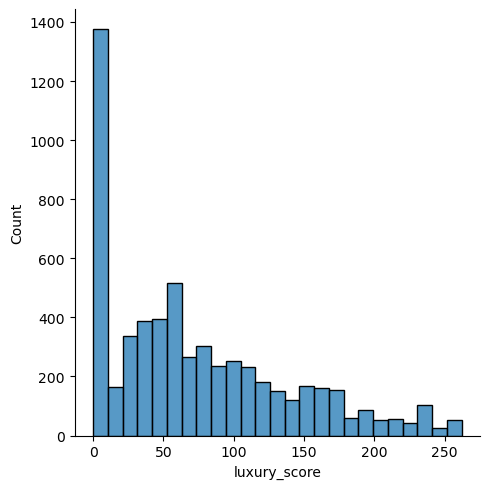

In [66]:
sns.displot(df['luxury_score'])

<Axes: >

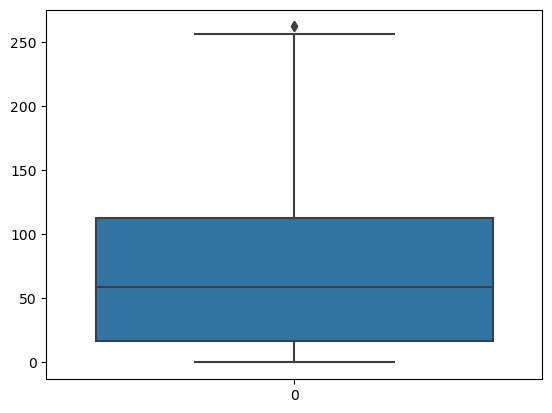

In [67]:
sns.boxplot(df['luxury_score'])

In [68]:
df.shape

(5881, 23)

In [69]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [70]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,gurukul,2.40,11111.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3,3.0,North,Relatively New,NaN,2160.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,86.0
1,house,omkar bunglows,thaltej,4.75,15079.0,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 315 ...,4.0,4.0,1,2.0,East,Old Property,NaN,315.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,161.0
2,flat,sheeva amardeep enclave,nava naroda,0.27,2400.0,1125.0,Built Up area: 125 (11.61 sq.m.)Carpet area: 1...,2.0,2.0,1,3.0,NaN,Undefined,NaN,125.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,flat,arizona river heights,usmanpura,2.10,8910.0,2357.0,Super Built up area 2357(218.97 sq.m.)Carpet a...,3.0,3.0,2,11.0,East,Moderately Old,2357.0,NaN,1415.0,0.0,0.0,0.0,1.0,1.0,1.0,54.0
4,flat,avirat silver harmony,gota,0.98,4840.0,2025.0,Super Built up area 2025(188.13 sq.m.),3.0,3.0,1,9.0,East,Moderately Old,2025.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,75.0


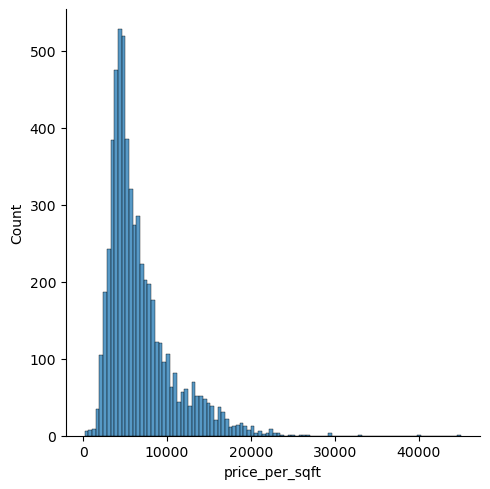

In [71]:
sns.displot(df['price_per_sqft'])

<Axes: >

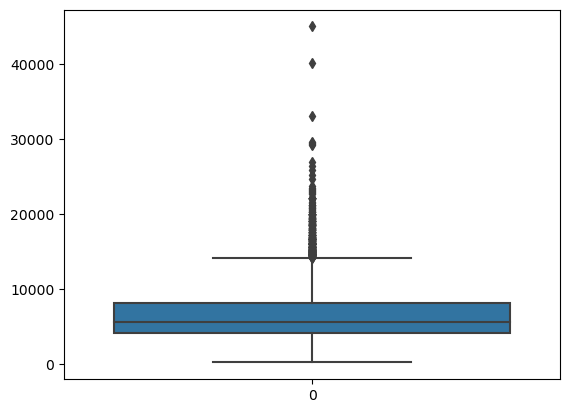

In [72]:
sns.boxplot(df['price_per_sqft'])

In [73]:
df[df['price_per_sqft'] > 35000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
403,house,independent,vastral,4.26,45079.0,945.0,Built Up area: 105 (9.75 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,105.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3718,house,rachana society,satellite,6.51,40185.0,1620.0,Plot area 1620(150.5 sq.m.)Carpet area: 5760 s...,2.0,2.0,2,2.0,North-West,Old Property,NaN,NaN,5760.0,1.0,0.0,1.0,1.0,0.0,1.0,156.0


In [74]:
df['area'] = df.apply(lambda row: row['area']*9 if row['price_per_sqft']>35000 else row['area'], axis=1)

In [75]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

<Axes: >

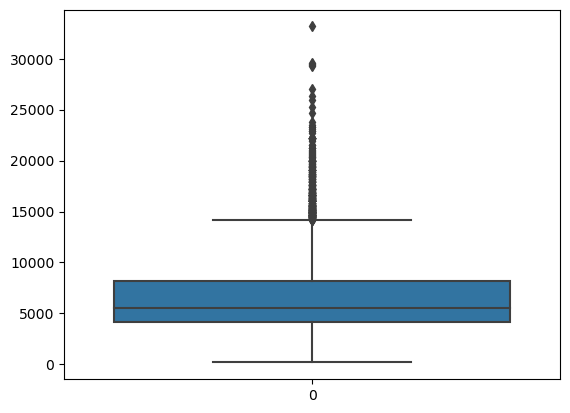

In [76]:
sns.boxplot(df['price_per_sqft'])

In [77]:
df['ratio'] = df['area']/df['bedRoom']

In [78]:
df_house = df[df['property_type']=='house']
df_flat = df[df['property_type']=='flat']

In [79]:
x = df_house[df_house['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

225.0

In [80]:
x = df_flat[df_flat['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

268.4

In [81]:
# after analysing above data number we choose
house_outliar = df_house[df_house['ratio']<200]
flat_outliar = df_flat[df_flat['ratio']<170]

In [82]:
df.drop(index=flat_outliar.index.to_list(),inplace=True)
df.drop(index=house_outliar.index.to_list(),inplace=True)

In [83]:
df.drop(columns='ratio',inplace=True)

In [84]:
df.shape

(5820, 23)

In [85]:
df.to_csv(interim_path / 'properties_outlier_treated.csv',index=False)